In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Import Data**

In [2]:
df = pd.read_csv("/content/drive/MyDrive/training.1600000.processed.noemoticon.csv", encoding='latin1')
df.head(3)

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire


# **Data Cleaning**

In [3]:
df.shape

(1599999, 6)

**Assign Names to the Columns**

In [4]:
column_names = ['target', 'id', 'date', 'flag', 'user', 'text']

In [5]:
df = pd.read_csv("/content/drive/MyDrive/training.1600000.processed.noemoticon.csv", names=column_names ,encoding='latin1')
df.head(3)

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...


In [6]:
df.shape

(1600000, 6)

**Handling Missing Values**

In [7]:
df.isnull().sum()

,0
target,0
id,0
date,0
flag,0
user,0
text,0


**Handling Duplicates**

In [8]:
df.duplicated().sum()

np.int64(0)

**Output Labeling**

In [9]:
df['target'].value_counts()

,count
target,
0,800000
4,800000


In [12]:
df['target'].replace({4: 1}, inplace=True)

In [14]:
df['target'].value_counts()  # 0 -> Negetive, 1 -> Positive

,count
target,
0,800000
1,800000


**Select Only Required Columns**

In [20]:
df = df[['text', 'target']]

In [21]:
df.head(3)

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0


# **Data Preprocessing**

**StopWords**

In [18]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**Stemming**

In [16]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

**Function to Remove StopWords and Perform Stemming**

In [19]:
import re

def stemming(data):
  stemmed_content = re.sub('[^a-zA-Z]', ' ', data)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [stemmer.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)

  return stemmed_content

In [22]:
df['text'] = df['text'].apply(stemming)

In [23]:
df.head(3)

,text,target
0,switchfoot http twitpic com zl awww bummer sho...,0
1,upset updat facebook text might cri result sch...,0
2,kenichan dive mani time ball manag save rest g...,0


# **Input Output Selection**

In [26]:
x = df['text'].values
y = df['target'].values

In [27]:
print(x)

['switchfoot http twitpic com zl awww bummer shoulda got david carr third day'
 'upset updat facebook text might cri result school today also blah'
 'kenichan dive mani time ball manag save rest go bound' ...
 'readi mojo makeov ask detail'
 'happi th birthday boo alll time tupac amaru shakur'
 'happi charitytuesday thenspcc sparkschar speakinguph h']


In [28]:
print(y)

[0 0 0 ... 1 1 1]


In [29]:
print(x.shape, y.shape)

(1600000,) (1600000,)


# **Splitting the Data into Trainning and Test**

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

# **Vectorization**

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

In [31]:
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [32]:
print(x_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 9453092 stored elements and shape (1280000, 461488)>
  Coords	Values
  (0, 436713)	0.27259876264838384
  (0, 354543)	0.3588091611460021
  (0, 185193)	0.5277679060576009
  (0, 109306)	0.3753708587402299
  (0, 235045)	0.41996827700291095
  (0, 443066)	0.4484755317023172
  (1, 160636)	1.0
  (2, 109306)	0.4591176413728317
  (2, 124484)	0.1892155960801415
  (2, 407301)	0.18709338684973031
  (2, 129411)	0.29074192727957143
  (2, 406399)	0.32105459490875526
  (2, 433560)	0.3296595898028565
  (2, 77929)	0.31284080750346344
  (2, 443430)	0.3348599670252845
  (2, 266729)	0.24123230668976975
  (2, 409143)	0.15169282335109835
  (2, 178061)	0.1619010109445149
  (2, 150715)	0.18803850583207948
  (2, 132311)	0.2028971570399794
  (2, 288470)	0.16786949597862733
  (3, 406399)	0.29029991238662284
  (3, 158711)	0.4456939372299574
  (3, 151770)	0.278559647704793
  (3, 56476)	0.5200465453608686
  :	:
  (1279996, 318303)	0.21254698865277744
  (12

In [33]:
print(x_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2289192 stored elements and shape (320000, 461488)>
  Coords	Values
  (0, 15110)	0.1719352837797837
  (0, 31168)	0.1624772418052177
  (0, 67828)	0.26800375270827315
  (0, 106069)	0.36555450010904555
  (0, 132364)	0.255254889555786
  (0, 138164)	0.23688292264071406
  (0, 171378)	0.2805816206356074
  (0, 271016)	0.45356623916588285
  (0, 279082)	0.17825180109103442
  (0, 388348)	0.2198507607206174
  (0, 398906)	0.34910438732642673
  (0, 409143)	0.3143047059807971
  (0, 420984)	0.17915624523539805
  (1, 6463)	0.30733520460524466
  (1, 15110)	0.211037449588008
  (1, 145393)	0.575262969264869
  (1, 217562)	0.40288153995289894
  (1, 256777)	0.28751585696559306
  (1, 348135)	0.4739279595416274
  (1, 366203)	0.24595562404108307
  (2, 22532)	0.3532582957477176
  (2, 34401)	0.37916255084357414
  (2, 89448)	0.36340369428387626
  (2, 183312)	0.5892069252021465
  (2, 256834)	0.2564939661498776
  :	:
  (319994, 443794)	0.2782185641032538


# **Training the Machine Learning Model**

**Fitting the Model**

In [34]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=1000)
LR.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

**Checking the Accuracy of the Model**

In [35]:
LR.score(x_train, y_train), LR.score(x_test, y_test) # Overfitting Check

(0.79871953125, 0.77668125)

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report

y_pred = LR.predict(x_test)

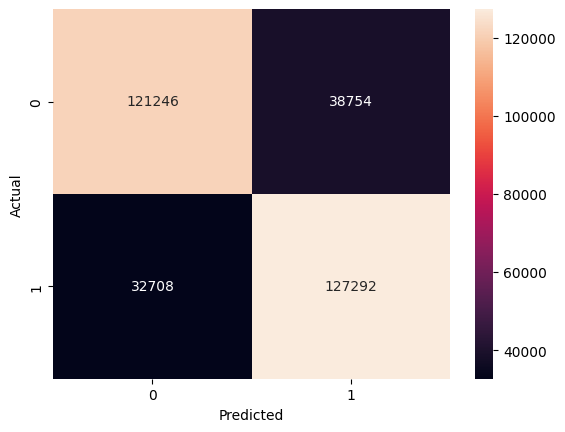

In [40]:
confusion_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [41]:
auc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy: {auc}')
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Accuracy: 0.77668125
F1 Score: 0.7808223379523135
Precision: 0.7666068438866338
Recall: 0.795575


In [43]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.76      0.77    160000
           1       0.77      0.80      0.78    160000

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



# **Performing Prediction**

In [45]:
input_text = "@gummibunny24 haha you'll have to watch it indeed, you've got homework now"

input_data = stemming(input_text)

input_data = vectorizer.transform([input_data])

prediction = LR.predict(input_data)

if prediction[0] == 0:
  print('Negetive')
else:
  print('Positive')

Positive


# **Saving the Model**

In [46]:
import pickle

pickle.dump(LR, open('model.pkl', 'wb'))

# **Saving Other Required Objects**

In [ ]:
pickle.dump(stemmer, open('stemmer.pkl', 'wb'))
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))